In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes

Here we're going to go through a basic Naive Bayes classifier. Specifically we're going to build a spam filter. As we've said before, this is a classic use for this kind of classifier and it's not too difficult to set up. The dataset we'll work with is UC Irvine's [SMS spam dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

This dataset has a few nice attributes. Firstly, it's pre-labelled, which is great for our purposes as we don't have to make our own spam/ham labels ('ham' being the common term to denote a message that is not spam). Secondly, the dataset is relatively small, which will allow us to show off one of the great things about Naive Bayes, its ability to train on relatively little data while achieving reasonable accuracy. 

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw_orignal = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw = sms_raw_orignal.copy(deep=True)
sms_raw.columns = ['spam', 'message']
sms_raw.sample(5)

,spam,message
2515,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.
3434,ham,Christmas is An occasion that is Celebrated as...
5455,ham,Wishing you a beautiful day. Each moment revea...
286,ham,"K, I might come by tonight then if my class le..."
3934,ham,"Playin space poker, u?"


So we've loaded up the dataset and we have two columns, a label and a message.

Now, a message isn't really a feature. If you tried to make it one it'd be pretty useless. However, we can engineer features from the message field relatively easily. This kind of feature engineering is a basic version of what we'll cover in the NLP section.

At the most obvious level, a feature from the message can be whether it contains a given word. Let's add those columns to our dataframe. The words chosen below are simply intuited as possibly having something to do with spam. Try some of your own ideas too!

In [3]:
keywords=['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']
def convert_data(sms_raw, data_only=False, keywords=['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']):
    for key in keywords:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        # TGA case=False: case insensitive
        
  
        if(data_only == False):
            sms_raw[str(key)] = sms_raw.message.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
        # data only is true to convert only the data_portion of one data point
        else:
            sms_raw[str(key)] = sms_raw.message.lower().find(str(' ' + key + ' ' )) != -1
    if(not data_only):
        sms_raw['allcaps'] = sms_raw.message.str.isupper()
        sms_raw['spam'] = sms_raw['spam'].apply(lambda x: x == 'spam' or x == 1)
    else:
        sms_raw['allcaps'] = sms_raw.message.isupper()

    return sms_raw


sms_raw = convert_data(sms_raw)
sms_raw.sample(5)

,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps
2451,False,K..give back my thanks.,False,False,False,False,False,False,False,False
5539,False,Just sleeping..and surfing,False,False,False,False,False,False,False,False
833,True,"Dear Voucher Holder, To claim this weeks offer...",False,False,False,False,False,False,False,False
3530,True,Xmas & New Years Eve tickets are now on sale f...,False,False,False,False,False,False,False,False
123,True,Todays Voda numbers ending 7548 are selected t...,False,False,False,False,False,False,False,False


Note that you could add new features to the dataframe simply by adding them to the keywords list. That's much nicer than doing each word manually. If it were more complicated it would probably be worth making a function as well.

Another feature option would be if the message is all uppercase. That seems kind of spammy doesn't it?

In [4]:
# included in the function
#sms_raw['allcaps'] = sms_raw.message.str.isupper()

Before we go further, let's turn the spam column into a boolean so we can easily do some statistics to prepare for modeling.

In [5]:
#sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

#TGA Alternative way, you an run it many times
# included in the function
#sms_raw['spam'] = sms_raw['spam'].apply(lambda x: x == 'spam' or x == 1)

Now, as we covered before one of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other. Let's check to see how true that is in this case using Pandas' built in correlation matrix function, corr(), and the heatmap from seaborn.

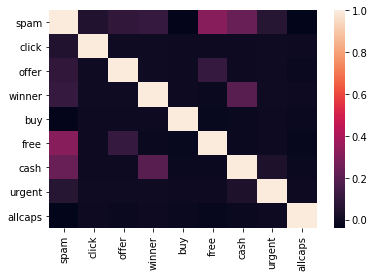

In [6]:
sns.heatmap(sms_raw.corr())

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are free:offer and cash:winner. For now, let's keep everything in the dataset.

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles `data` and `target`.

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

print(data.sample(5))
print(target.sample(5))

      click  offer  winner    buy   free   cash  urgent  allcaps
586   False  False   False  False  False  False   False    False
2216  False  False   False  False  False  False   False    False
2652  False  False   False  False  False  False   False    False
4355  False  False   False  False  False  False   False    False
3921  False  False   False  False   True  False   False    False
1741     True
1162    False
4687    False
739     False
3361    False
Name: spam, dtype: bool


In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


Now try adding some of your own features and seeing if you can improve the model's performance. Also try comparing the other types of Naive Bayes Classifier and see which one is best. You can find the function names for training other kinds of Naive Bayes in the [documentation](http://scikit-learn.org/stable/modules/naive_bayes.html). It's a one word change.

## Bayesian Poisoning

When implementing Naive Bayes, there is one more thing you must be aware of. Because Naive Bayes relies on probabilities and these probabilities are often based around obvious keywords it is a vulnerable model. By that we mean that people can manipulate the model. This is done through a process called __Bayesian Poisoning__.

In spam, this would be done through including words in your spam message that would be highly unlikely to be part of a spam message. This would convince the model that the message is legitimate and let it into your inbox or wherever.

Can you think of how you could do that here? Look at some spam messages that your model correctly identified and see if you can reword or rework them to get them classified as ham.

In [13]:
# TGA: confirm misclassfied entries

# misclassfied entries
sms_raw['pred'] = y_pred
# TGA: this returns a funny array(as andrew ng calls it) something like this [1,]
#=> np.where(target != y_pred)
print(len(np.where(target != y_pred)[0]))
wrong = sms_raw.loc[np.where(target != y_pred)[0]]
# corretly classfied
right = sms_raw.loc[np.where(target == y_pred)[0]]
# correctly classfied spams
right_spams = right[right['spam'] == True]
right_spams.head()

604


,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps,pred
9,True,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,True
12,True,URGENT! You have won a 1 week FREE membership ...,False,False,False,False,True,False,False,False,True
15,True,"XXXMobileMovieClub: To use your credit, click ...",True,False,False,False,False,False,False,False,True
42,True,07732584351 - Rodger Burns - MSG = We tried to...,False,False,False,False,True,False,False,False,True
93,True,Please call our customer service representativ...,False,False,False,False,False,True,False,False,True


In [14]:
# TGA: How does Bernouli Naive Bayes work

# My own implementation to train the model

probs = {}
ham = sms_raw[sms_raw.spam == False]
spam = sms_raw[sms_raw.spam == True]
for each in data.columns:
    print("feature = ", each)
    print()
    # probability that a word is not present in ham emails
    falseham = len(ham[ham[each] == False]) /len(ham)
    print("P(", each, "= False/y=ham ): ", falseham)
   
    # probability that a word is present in ham emails
    trueham = len(ham[ham[each] == True]) /len(ham)
    print("P(", each, "= True/y=ham): ", trueham)
    
    # probability of a word is present in spam emails
    truespam =  len(spam[spam[each] == True]) /len(spam)
    print("P(", each, "= True/y=spam): ", truespam)
    
    # probability of a word is not present in spam emails
    falsespam = len(spam[spam[each] == False]) /len(spam)
    print("P(", each, "= False/y=spam): ", falsespam)

    probs[each]=(falseham, trueham, truespam, falsespam)
    print()
# and this is probability of outcomes
print("outcome: spam? ")
print(target.value_counts())

feature =  click

P( click = False/y=ham ):  0.9995854922279793
P( click = True/y=ham):  0.0004145077720207254
P( click = True/y=spam):  0.00535475234270415
P( click = False/y=spam):  0.9946452476572959

feature =  offer

P( offer = False/y=ham ):  0.9991709844559585
P( offer = True/y=ham):  0.0008290155440414508
P( offer = True/y=spam):  0.01606425702811245
P( offer = False/y=spam):  0.9839357429718876

feature =  winner

P( winner = False/y=ham ):  1.0
P( winner = True/y=ham):  0.0
P( winner = True/y=spam):  0.013386880856760375
P( winner = False/y=spam):  0.9866131191432396

feature =  buy

P( buy = False/y=ham ):  0.9898445595854922
P( buy = True/y=ham):  0.010155440414507772
P( buy = True/y=spam):  0.0013386880856760374
P( buy = False/y=spam):  0.998661311914324

feature =  free

P( free = False/y=ham ):  0.9915025906735752
P( free = True/y=ham):  0.00849740932642487
P( free = True/y=spam):  0.16599732262382866
P( free = False/y=spam):  0.8340026773761714

feature =  cash

P( cash

In [15]:
# a function which calcuates probabiliy of a datapoint based on Bernouli Naive Bayes 
def calculate_prob(data_point):
    # a list to store p(each feature/given y is ham)
    hamx = list()
    # a list to store p(each feature/given y is spam)
    spamx = list()
   
    ham = 1
    spam = 1
    for word in probs.keys():
        #print(word )
        # if word is in query data(data to be predicited)
        if(word in data_point):
            ham *= probs[word][1]
            hamx.append(probs[word][1])
            spam *= probs[word][2]
            spamx.append(probs[word][2])

        else:
            ham *= probs[word][0]
            hamx.append(probs[word][0])
            spam *= probs[word][3]
            spamx.append(probs[word][3])
        #print("ham = ", ham)
        #print("spam = ", spam)  
    ham *= 0.87
    spam *= 0.13
    return (spam , ham, spam > ham, hamx, spamx)

# Test the model with one data

data_point = data.loc[9]
# it is calculated like this 
# probability of y is spam given this input x 
#                =
# probability of x1(or click) is not present/ y is spam
#                 *
# probability of x2(or offer) is not present/y is spam
#                 *
#                ...
#                ...
# proability of x5(or free) is present/y is spam
#                 *
#                ...
#                ...
#probabilty of x8(or allcaps ) is not present/y is spam
#                 *
# probability of spam
#__________________
# The same way we can calculate probability of y is ham given this input x
# present and not represent are represented by True and False in the dataset

# the larger one wins but we don't take the probability numbers seriously
# according to the literature specified on the curriclum


# find the words that are True only and descard the rest
data_point = data_point.index[np.where(data_point)]
# calcualte prob of y=spam/x and prob of y=ham/x
result =calculate_prob(data_point)
print(result[0], result[1])
print(data_point, "is predicted to be ", result[2])

0.0190449540470997 0.007158846311217922
Index(['free'], dtype='object') is predicted to be  True


In [16]:
# Now I will test all the dataset
pred_manual = list()
for i in range(len(sms_raw)):
    data_point = data.loc[i]
    data_point = data_point.index[np.where(data_point)]
    pred_manual.append(calculate_prob(data_point))

# I can assert that my implementation is correct
assert((pd.Series(pred_manual) == sms_raw.pred).sum() == 0)

In [17]:
# confirming the calculated values for the prediction of data point 9

# product of these calculated hams and finally  0.87 is eqivalent to p(y=ham/given data point 9)
np.prod(result[3])*0.87

0.007158846311217922

In [18]:
# product of these calculated spams and finally  0.13 is eqivalent to p(y=spam/given data point 9)
np.prod(result[4])*0.13

0.0190449540470997

In [19]:
# I assert that the two are equal to the calcualted values by the function
assert(np.prod(result[4])*0.13 == result[0])
assert(np.prod(result[3])*0.87 == result[1])

##Big Claps, Nice work!!!

There are  4825  ham emails
There are  747  spam emails


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


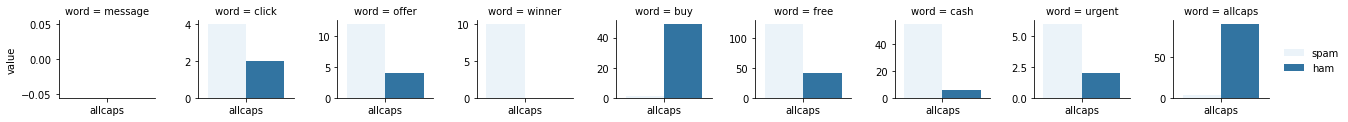

In [21]:
# Let me do some bayesian poisioning

# Which words are most likely not a spam(ham)
# Which words are most likely to be a spam

# Lists that will be used to create a dataframe
word_index = []
word_list = ham.columns[1:-1]
# stores the number of times  word is present in spam mails
spam_list = []
# stores the number of times each word is present in ham emails
ham_list = []

print("There are ", ham.shape[0], " ham emails")
print("There are ", spam.shape[0], " spam emails")

for col in ham.columns[1:-1]:
    word_index.append(col)
    ham_list.append(ham[ham[col] == True].shape[0])
    spam_list.append(spam[spam[col] == True].shape[0])
    #print(col, " : " ,ham[ham[col] == True].shape[0])
    #print(col, " : " ,spam[spam[col] == True].shape[0])
    
count_df = pd.DataFrame({"word" : word_list, "spam" : spam_list, "ham": ham_list})

count_df
# Then melt it
count_df_melted = pd.melt(count_df,id_vars="word")


count_df_melted
# see graph
g = sns.FacetGrid(count_df_melted, col='word', height=2,sharey=False)

ax = g.map(sns.barplot, 'word','value', 'variable',hue_order=['spam', 'ham'])
for i in range(9):
    ax.axes[0,i].set_xlabel('')
ax.add_legend()

#plt.show()


The features are not present in the dataset for the most part. I can see that many ham emails contain allcaps and buy while spams emails contain winner, cash, urgent, free, offer, click much more than hams in order. 



In [22]:
# finding correctly identified spam emails
spam_identified = spam[spam['spam'] == spam['pred']] 
# see the head 3
spam_identified.head(3)

,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps,pred
9,True,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,True
12,True,URGENT! You have won a 1 week FREE membership ...,False,False,False,False,True,False,False,False,True
15,True,"XXXMobileMovieClub: To use your credit, click ...",True,False,False,False,False,False,False,False,True


In [23]:
spam.loc[9]['message']

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [24]:
spam.loc[12]['message']

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [25]:
spam.loc[15]['message']

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [26]:
# before altering the data
for i in [9,12,15]:
    # convert statment to feature vector and call predict for all datapoints
    before = bnb.predict(np.array(convert_data(spam.loc[i][1:-1], data_only=True)[1:]).reshape(1, -1))
    print("before poisioning row ",i,": ", before)

before poisioning row  9 :  [ True]
before poisioning row  12 :  [ True]
before poisioning row  15 :  [ True]


In [27]:
# let me alter free with free-
spam.at[9, 'message'] =  spam.loc[2]['message'].replace("Free", "Free-")
spam.at[12, 'message'] =  spam.loc[12]['message'].replace("Free", "Free-")
# for data point 15 click is present I will capitalize everything
spam.at[15, 'message'] =  spam.loc[15]['message'].upper()

In [28]:
# after altering the data
for i in [9,12,15]:
    # convert statment to feature vector and call predict for all datapoints
    after = bnb.predict(np.array(convert_data(spam.loc[i][1:-1], data_only=True)[1:]).reshape(1, -1))
    print("after poisioning row ",i,": ", after)

after poisioning row  9 :  [False]
after poisioning row  12 :  [ True]
after poisioning row  15 :  [False]


The alteration worked for data point 9 and data point 15, but it didn't work for data point 12. I can add buy to data 12 and it may change. 

Next I will try to try differnet types of Naive Bayes and also add some features see performance change

In [29]:
# Bernoulli NB
def test_models(model,data,target):
    model.fit(data, target)
    y_pred = model.predict(data)
    print("Number of mislabeled points out of a total {} points : {}, accuracy: {}% ".format(data.shape[0],(target != y_pred).sum(), (target == y_pred).sum()/data.shape[0]))

In [30]:
from sklearn.naive_bayes import BernoulliNB
test_models(BernoulliNB(),data,target)
from sklearn.naive_bayes import GaussianNB
test_models(GaussianNB(),data,target)
from sklearn.naive_bayes import MultinomialNB
test_models(MultinomialNB(),data,target)

Number of mislabeled points out of a total 5572 points : 604, accuracy: 0.8916008614501076% 
Number of mislabeled points out of a total 5572 points : 604, accuracy: 0.8916008614501076% 
Number of mislabeled points out of a total 5572 points : 693, accuracy: 0.8756281407035176% 


#### Imporoving Performance

I will try to improve performance by adding most frequently used words in spam and non-spam emails as features

In [31]:
#https://stackoverflow.com/questions/18936957/count-distinct-words-from-a-pandas-data-frame
#Counter(" ".join(r1).split(" ")).items()
import re
from collections import Counter
# combine all strings in ham email and remove punctuation
ham_emails = " ".join(sms_raw_orignal[sms_raw_orignal[0] == 'ham'][1])
ham_emails = re.sub(r'[^\w\s]','',ham_emails)
# combine all strings in spam email and remove punctuation
spam_emails = " ".join(sms_raw_orignal[sms_raw_orignal[0] == 'spam'][1])
spam_emails = re.sub(r'[^\w\s]','',spam_emails)


ham_word_count = Counter(ham_emails.split(" "))
spam_word_count = Counter(spam_emails.split(" "))

# find common ham words
#print(ham_word_count.most_common(10))
#print(spam_word_count.most_common(10))

In [33]:
from nltk.corpus import stopwords
# all english stop words
en_stops = set(stopwords.words('english'))
# take only non-stop words
top_ham_words = [w for w, c in ham_word_count.most_common() if w not in en_stops]
top_spam_words = [w for w, c in spam_word_count.most_common() if w not in en_stops]
print("A total of ", len(top_ham_words), " ham words")
print("A total of ", len(top_spam_words), " spam words")

A total of  9067  ham words
A total of  3520  spam words


In [34]:
# let me see top 50 ham words
top_ham_words[:50]
# I hand picked these features
selected_features_ham = ['get','know','like','call','got','time','home','need','good','love']

In [35]:
# top 50 spam words
top_spam_words[:50]
selected_features_spam = ['call','u','claim','prize','stop','reply','contact','need','awarded','please']

In [36]:
# Now Let me experiment again with these addtional 20 features
original_keywords=['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

sms_raw = convert_data(sms_raw, keywords=original_keywords + selected_features_ham + selected_features_spam)

data = sms_raw[original_keywords + ['allcaps'] + selected_features_ham + selected_features_spam ]
target = sms_raw['spam']

test_models(BernoulliNB(), data, target)


Number of mislabeled points out of a total 5572 points : 519, accuracy: 0.9068557071069634% 


The accuracy is slightly improved